# Exploratory Data Analysis Starter

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

## CLIENT DATASET

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [4]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [5]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [6]:
client_df.describe(include='object')

,id,channel_sales,date_activ,date_end,date_modif_prod,date_renewal,has_gas,origin_up
count,14606,14606,14606,14606,14606,14606,14606,14606
unique,14606,8,1796,368,2129,386,2,6
top,f531674404e917235e05af1ebb592404,foosdfpfkusacimwkcsosbicdxkicaua,2009-08-01,2016-02-01,2015-11-01,2015-06-23,f,lxidpiddsbxsbosboudacockeimpuepw
freq,1,6754,95,145,721,587,11955,7097


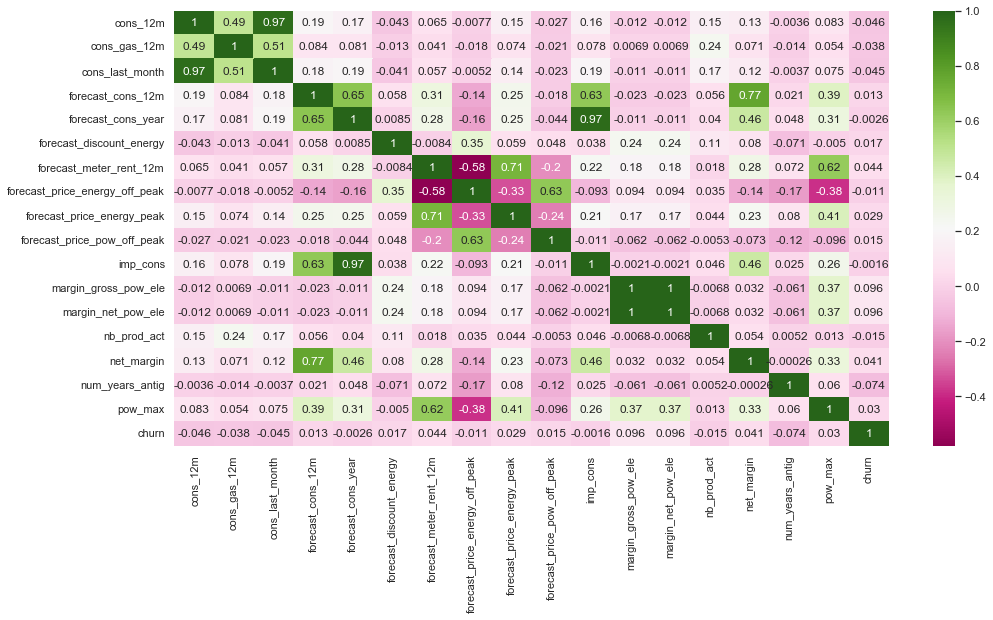

In [27]:
# checking the correlation of numerical features

plt.figure(figsize = (16,8))
corr = client_df.corr()
sns.heatmap(corr, annot=True, cmap ='PiYG')
plt.show()

## KEY FINDINGS

#### Strongly positive correlated columns - cons_12m & cons_last_month, margin_gross_pow_ele and margin_net_power_ele,  imp_cons & forecast_cons_year (>90%)
#### Strongly negative correlated columns - forecast_meter_rent_12m & forecast_price_energy_off_peak (58%)

---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [7]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

# EDA ON CLIENT DATA
### We shall be dividing the features into these categories and perform descriptive analysis on each
### 1) CLIENT BASIC INFO --> 'id','channel_sales', 'origin_up','churn', 'nb_prod_act','num_years_antig','has_gas'
### 2) PAST CONSUMPTION --> 'cons_12m', 'cons_gas_12m', 'cons_last_month'
### 3) DATE COLUMNS --> 'date_activ','date_end', 'date_modif_prod', 'date_renewal'
### 4) FORECAST COLUMNS --> 'forecast_cons_12m','forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'forecast_discount_energy','forecast_meter_rent_12m'
### 5) PRESENT CONSUMPTION --> 'imp_cons','pow_max', 'margin_gross_pow_ele', 'margin_net_pow_ele','net_margin'

### We will be using barplot to analyze distribution of categorical features with respect to target (churn) and histogram / boxplot for numerical features

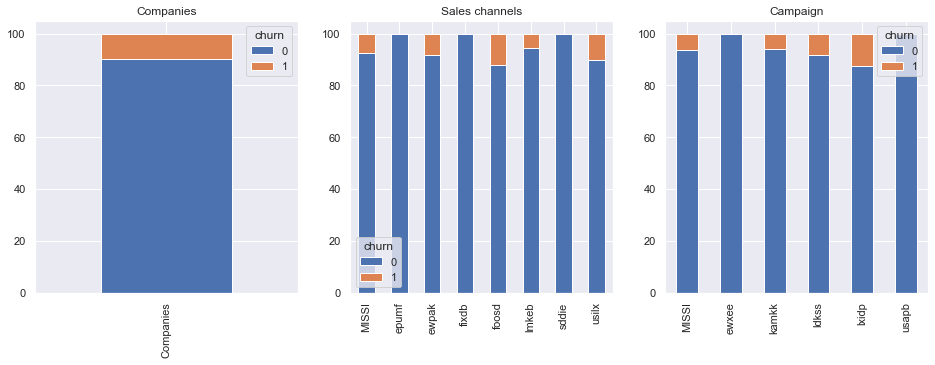

In [8]:
churn = client_df[['id','channel_sales', 'origin_up','churn']]
churn.columns = ['Companies', 'Sales channels', 'Campaign', 'churn']

fig, axes = plt.subplots(1, 3, figsize=(16,5))
i = 0

churn_total = churn.groupby(churn['churn'])[['Companies']].count()
churn_percentage = churn_total / churn_total.sum() * 100
churn_percentage.transpose().plot.bar(ax=axes.flat[i], stacked=True)
axes.flat[i].set_title('Companies')

for col in ['Sales channels', 'Campaign']:  
    i=i+1
    churn_percentage = churn.groupby(churn[col])['churn'].value_counts(normalize=True)*100
    df_churn = churn_percentage.unstack()
    df_churn.index = [x[:5] for x in df_churn.index]
    df_churn.plot.bar(ax=axes.flat[i], stacked=True)
    axes.flat[i].set_title(col)
plt.show()

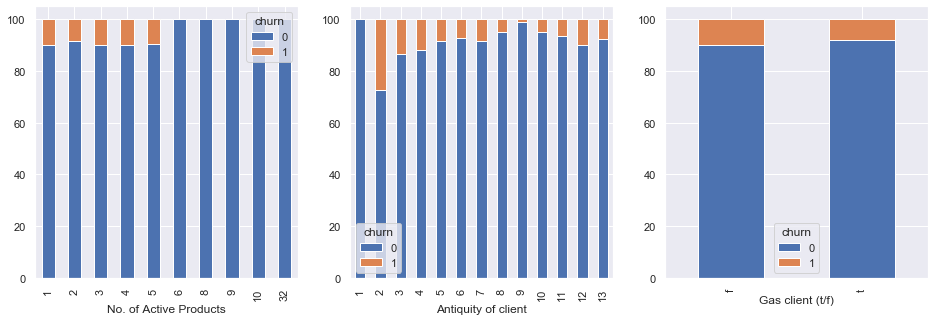

In [9]:
churn = client_df[['nb_prod_act','num_years_antig','has_gas','churn']]
churn.columns = ['No. of Active Products', 'Antiquity of client', 'Gas client (t/f)', 'churn']

fig, axes = plt.subplots(1, 3, figsize=(16,5))
i = 0

for col in ['No. of Active Products', 'Antiquity of client', 'Gas client (t/f)']:  
    churn_percentage = churn.groupby(churn[col])['churn'].value_counts(normalize=True)*100
    df_churn = churn_percentage.unstack()
    df_churn.plot.bar(ax=axes.flat[i], stacked=True)
    i=i+1
plt.show()

## KEY FINDINGS FROM EDA

#### 1. Data is heavily imbalanced with only 10% of churn cases
#### 2. Clients from certain sales channels and campaigns are more prone to churn. This is something that needs to be investigated with more data
#### 3. Clients with more no of active products (>=6) are less likely to churn than those with less than 6 active products
#### 4. Recently subscribed clients have a higher chance of churning. Needs to be investigated further.
#### 5. Also, gas clients have a slightly lesser chance of churning (5-10%) than non-gas subscribers

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

In [10]:
## PAST CONSUMPTION VARIABLES

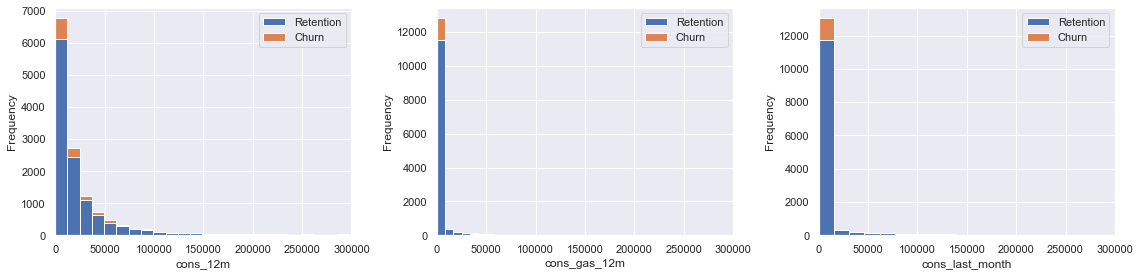

In [11]:
consumption = client_df[['cons_12m', 'cons_gas_12m', 'cons_last_month', 'churn']]

fig, axs = plt.subplots(nrows=1,ncols=3, figsize=(16, 4))

plot_distribution(consumption, 'cons_12m', axs.flat[0], bins_=500)
plot_distribution(consumption, 'cons_gas_12m', axs.flat[1], bins_=500)
plot_distribution(consumption, 'cons_last_month', axs.flat[2], bins_=50)

for i in range(3): axs.flat[i].set_xlim(0,300000)
plt.tight_layout()
plt.show()

## KEY FINDINGS FROM EDA

#### 1. Nothing much can be inferred since data is heavely left skewed with few large outliers showing that most clients are on the low end of consumption
#### 2. Most of the churn cases (1) are at the lower end

In [12]:
## DATE VARIABLES

In [13]:
dates = client_df[['date_activ','date_end', 'date_modif_prod', 'date_renewal','churn']]
dates[['date_activ','date_end', 'date_modif_prod', 'date_renewal']] = dates[['date_activ','date_end', 'date_modif_prod', 'date_renewal']].astype('datetime64[ns]')
dates.drop(columns = ['churn']).describe()

,date_activ,date_end,date_modif_prod,date_renewal
count,14606,14606,14606,14606
unique,1796,368,2129,386
top,2009-08-01 00:00:00,2016-02-01 00:00:00,2015-11-01 00:00:00,2015-06-23 00:00:00
freq,95,145,721,587
first,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00
last,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00


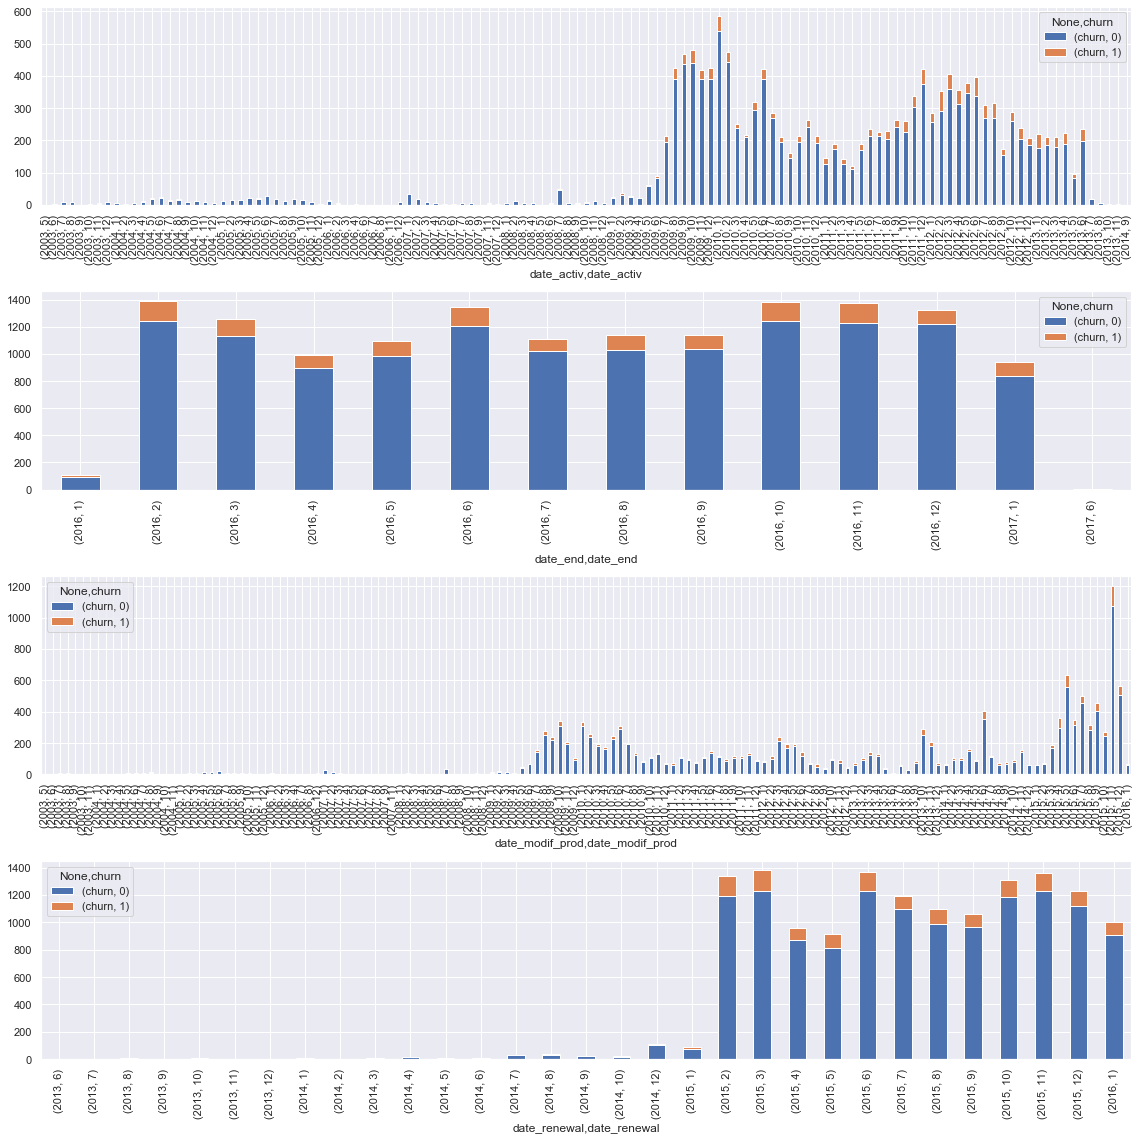

In [14]:
fig, axes = plt.subplots(4,1, figsize=(16,16))

i = 0
for col in ['date_activ','date_end', 'date_modif_prod', 'date_renewal']:    
    df_date = dates[[col,'churn']].groupby([dates[col].dt.year, dates[col].dt.month])['churn'].value_counts().to_frame()
    df_date.unstack().plot(kind='bar', ax=axes.flat[i], stacked=True)
    i = i+1
plt.tight_layout()

## KEY FINDINGS FROM EDA

#### 1. Most of the clients are subscribed from 2009 onwards, although there are a few older clients as well
#### 2. Recently subscribed clients have a higher churn rate as can be observed from graph 1 and 3

In [15]:
# FORECAST VARIABLES

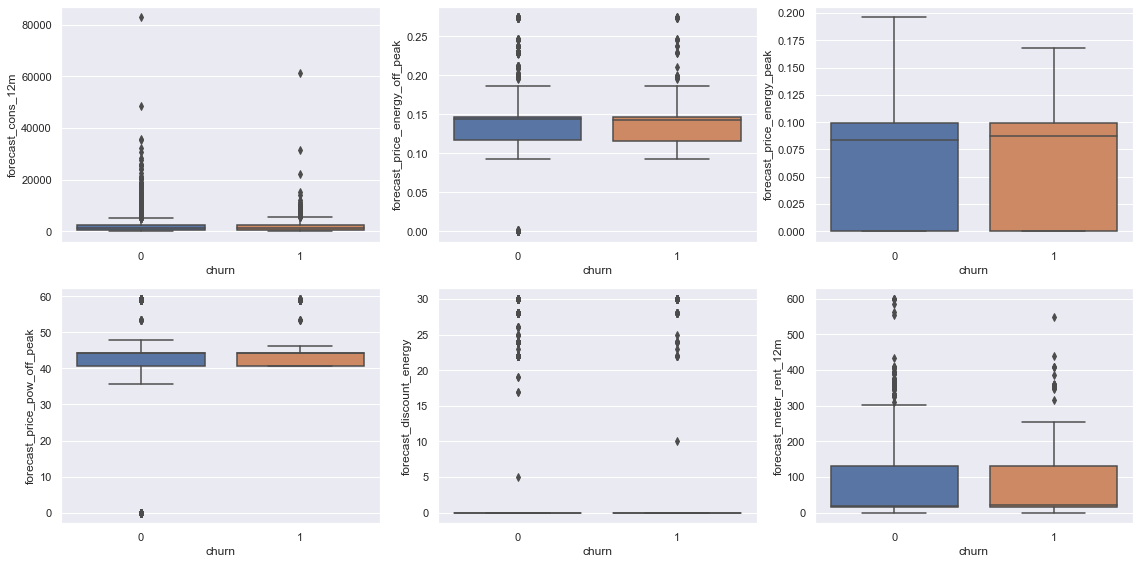

In [16]:
fig, axes = plt.subplots(2,3, figsize=(16,8))

forecast = ['forecast_cons_12m','forecast_price_energy_off_peak', 'forecast_price_energy_peak','forecast_price_pow_off_peak', 
            'forecast_discount_energy','forecast_meter_rent_12m'] 

df_forecast = client_df[forecast+['churn']]

i=0
for col in forecast:    
    sns.boxplot(data=df_forecast[[col,'churn']], x='churn', y=col, ax=axes.flat[i])
    i = i+1
plt.tight_layout()

## KEY FINDINGS FROM EDA

#### 1. There is no significant relation observed between the forecasted energy consumption and churn.
#### 2. Also no significant relation between forcasted discount and churn. This might indicate that clients are not basing their desicion to churn based on their current consumption and discount rates

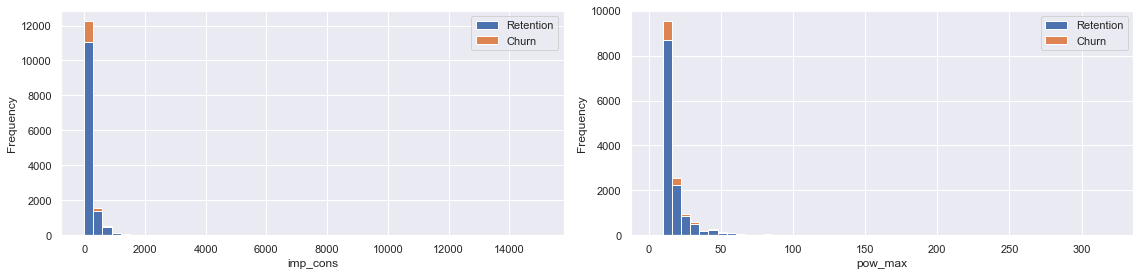

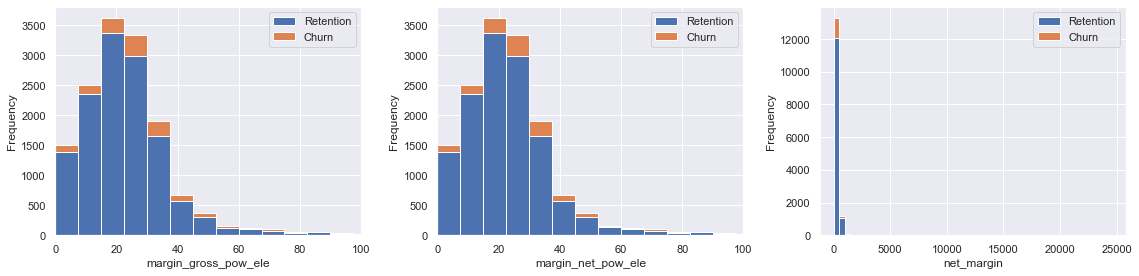

In [17]:
# PRESENT SUBSCRIPTION

present = ['imp_cons','pow_max']
df_present = client_df[present + ['churn']]

fig, axes = plt.subplots(1,2, figsize=(16,4))
plot_distribution(df_present, 'imp_cons', axes.flat[0])
plot_distribution(df_present, 'pow_max', axes.flat[1])

plt.tight_layout()
plt.show()

margin = ['margin_gross_pow_ele', 'margin_net_pow_ele','net_margin']
df_margin = client_df[margin + ['churn']]

fig, axs = plt.subplots(nrows=1,ncols=3, figsize=(16, 4))

i = 0
for col in margin:
    plot_distribution(df_margin, col, axs.flat[i])
    i=i+1
    
axs.flat[0].set_xlim(0,100)
axs.flat[1].set_xlim(0,100)

plt.tight_layout()
plt.show()

## KEY FINDINGS FROM EDA

#### 1. Current paid consumption & power subscribed are also observed to be left skewed and we can say that most of the churn is happening at the lower end. But nothing else can be inferred
#### 2. Gross and net margins for power subscription also show no significant relation with churn. 

## PRICE DATASET

In [18]:
price_df = pd.read_csv('price_data.csv')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [19]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [20]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [21]:
price_df.describe(include='object')

,id,price_date
count,193002,193002
unique,16096,12
top,f531674404e917235e05af1ebb592404,2015-12-01
freq,12,16094


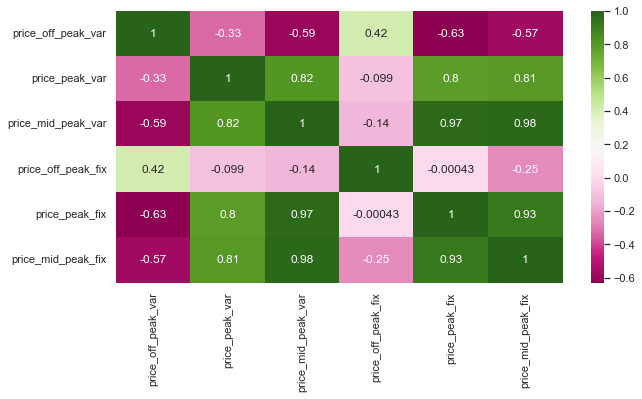

In [30]:
# checking the correlation of numerical features

plt.figure(figsize = (10,5))
corr = price_df.corr()
sns.heatmap(corr, annot=True, cmap ='PiYG')
plt.show()

## KEY FINDINGS

#### Strongly positive correlated columns - price_mid_peak_fix and price_peak_var, price_peak_fix and price_mid_peak_var, price_mid_peak_fix and price_peak_fix (>90%)
#### Strongly negative correlated columns - price_peak_fix & price_off_peak_var (63%)

In [22]:
# Since there are 16096 unique client ids in this data compared to 14606 in client_df, we have to perform left 
# join to get only the rel## KEY FINDINGS

#### Strongly positive correlated columns - cons_12m & cons_last_month, margin_gross_pow_ele and margin_net_power_ele, forecast_cons_12m & net_margin, imp_cons & forecast_cons_year, forecast_cons_12m & forecast_cons_year, forecast_cons_12m & imp_cons, forecast_meter_power_rent and imp_cons
#### Strongly negative correlated columns - forecast_meter_power_rent & forecast_price_energy_off_peak, forecast_price_energy_off_peak and pow_max evant records

client_prices = pd.merge(client_df[['id','churn']], price_df, how='left', on='id')

pd.set_option('display.max_rows', None)
client_prices.sort_values(by=['id','price_date']).head(100)

,id,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
93438,0002203ffbb812588b632b9e628cc38d,0,2015-01-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389
93439,0002203ffbb812588b632b9e628cc38d,0,2015-02-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389
93440,0002203ffbb812588b632b9e628cc38d,0,2015-03-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
93441,0002203ffbb812588b632b9e628cc38d,0,2015-04-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
93442,0002203ffbb812588b632b9e628cc38d,0,2015-05-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
93443,0002203ffbb812588b632b9e628cc38d,0,2015-06-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
93444,0002203ffbb812588b632b9e628cc38d,0,2015-07-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
93445,0002203ffbb812588b632b9e628cc38d,0,2015-08-01,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555
93446,0002203ffbb812588b632b9e628cc38d,0,2015-09-01,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555
93447,0002203ffbb812588b632b9e628cc38d,0,2015-10-01,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555


## CHECKING FOR PRICE SENSITIVITY

### We will go with the following three approaches
### 1) Comparing the mean fixed and variable prices between Jan and Dec 2015 with the churn status of companies
### 2) Comparing the price difference (fixed and variable) between Jan and Dec 2015 with the churn status
### 3) Comparing the variance in fixed and variable prices between Jan and Dec 2015 with the churn status

### For each of the following we will use box plots for comparing the two categories (0 - not churned 1- churned)

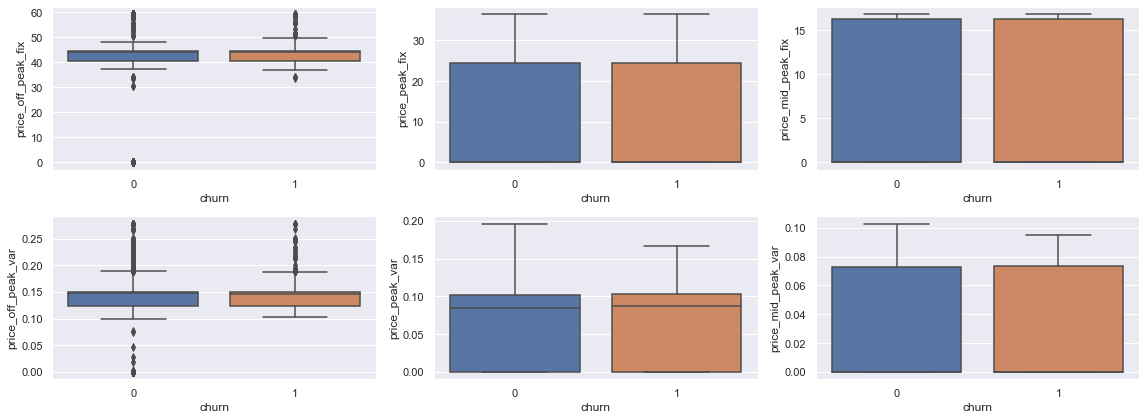

In [23]:
# 1) Comparing the mean fixed and variable prices between Jan and Dec 2015 with the churn status of companies

pd.set_option('display.max_rows', 60)

power_price = ['price_off_peak_fix','price_peak_fix','price_mid_peak_fix']
energy_price = ['price_off_peak_var','price_peak_var','price_mid_peak_var']


fix_price_mean = pd.pivot_table(client_prices, index=['id'], aggfunc = {'price_off_peak_fix': 'mean', 'price_peak_fix': 'mean',
                                                       'price_mid_peak_fix': 'mean', 'churn': 'mean'})
var_price_mean = pd.pivot_table(client_prices, index=['id'], aggfunc = {'price_off_peak_var': 'mean', 'price_peak_var': 'mean',
                                                       'price_mid_peak_var': 'mean', 'churn': 'mean'})

fig, axes = plt.subplots(2,3,figsize=(16,6))

i = 0
for col in power_price:
    sns.boxplot(data=fix_price_mean, x = 'churn', y=col, ax=axes.flat[i])
#     axes.flat[i].set_ylim(-2.5,2.5)
    i=i+1
for col in energy_price:
    sns.boxplot(data=var_price_mean, x = 'churn', y=col, ax=axes.flat[i])
#     axes.flat[i].set_ylim(-2.5,2.5)
    i=i+1
plt.tight_layout()
plt.show()

### KEY FINDINGS 

#### 1) There is no significant difference in churn based on the mean prices for power and energy (fixed and variable)
#### 2) Slightly higher values for Off peak fixed and variable prices, but requires further investigation

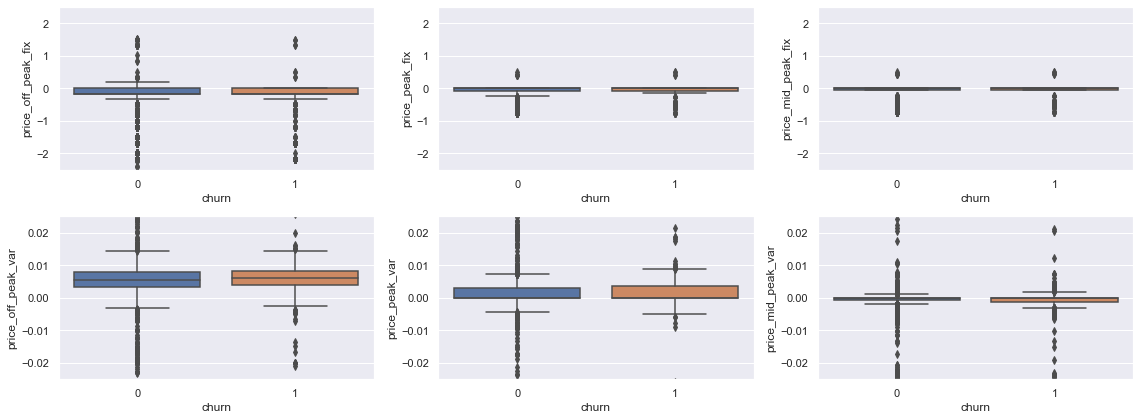

In [24]:
# 2) Comparing the price difference (fixed and variable) between Jan and Dec 2015 with the churn status
def price_difference(x):
    x1 = x[:1].values # Get first value
    x2 = x[-1:].values # Get last value    
    return x1 - x2

fix_price_diff = pd.pivot_table(client_prices, index=['id'], aggfunc = {'price_off_peak_fix': price_difference, 'price_peak_fix': price_difference,
                                                       'price_mid_peak_fix': price_difference, 'churn': 'mean'})
var_price_diff = pd.pivot_table(client_prices, index=['id'], aggfunc = {'price_off_peak_var': price_difference, 'price_peak_var': price_difference,
                                                       'price_mid_peak_var': price_difference, 'churn': 'mean'})

fig, axes = plt.subplots(2,3,figsize=(16,6))

i = 0
for col in power_price:
    sns.boxplot(data=fix_price_diff, x = 'churn', y=col, ax=axes.flat[i])
    axes.flat[i].set_ylim(-2.5,2.5)
    i=i+1
for col in energy_price:
    sns.boxplot(data=var_price_diff, x = 'churn', y=col, ax=axes.flat[i])
    axes.flat[i].set_ylim(-0.025,0.025)
    i=i+1
plt.tight_layout()
plt.show()

### KEY FINDINGS 

#### 1) There is no significant difference in churn based on the difference in prices from Jan to December 2015
#### 2) Slightly higher values for Off peak and peak fixed prices, but requires further investigation

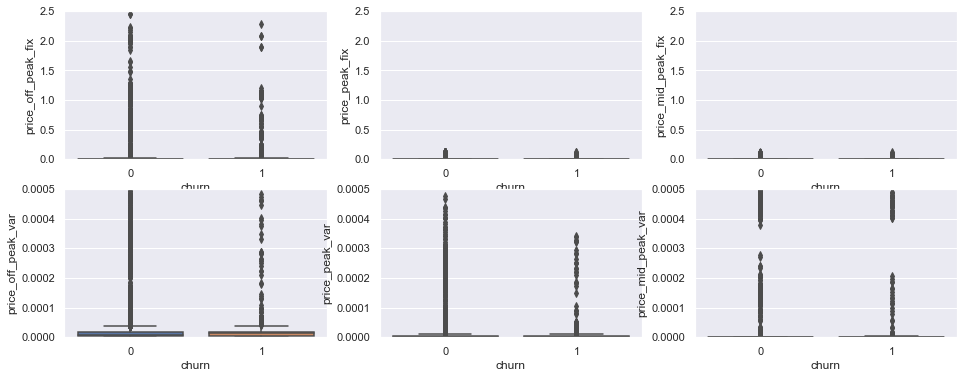

In [25]:
# 3) Comparing the variance in fixed and variable prices between Jan and Dec 2015 with the churn status

fix_price_var = pd.pivot_table(client_prices, index=['id'], aggfunc = {'price_off_peak_fix': 'var', 'price_peak_fix': 'var',
                                                       'price_mid_peak_fix': 'var', 'churn': 'mean'})
var_price_var = pd.pivot_table(client_prices, index=['id'], aggfunc = {'price_off_peak_var': 'var', 'price_peak_var': 'var',
                                                       'price_mid_peak_var': 'var', 'churn': 'mean'})

fig, axes = plt.subplots(2,3,figsize=(16,6))

i = 0
for col in power_price:
    sns.boxplot(data=fix_price_var, x = 'churn', y=col, ax=axes.flat[i])
    axes.flat[i].set_ylim(0,2.5)
    i=i+1
for col in energy_price:
    sns.boxplot(data=var_price_var, x = 'churn', y=col, ax=axes.flat[i])
    axes.flat[i].set_ylim(0,0.0005)
    i=i+1
plt.tight_layout
plt.show()

### KEY FINDINGS 

#### 1) There is no significant difference in churn based on the variance in prices for 2015 (fixed and variable)

# CONCLUSION OF EDA & PRICE SENSITIVITY ANALYSIS

#### 1) Overall, we do not find strong support for the hypothesis that the change in prices have led to an increase in churn among some clients. However, further investigation & modelling may be necessary to confirm the observation

#### 2) Churn data for several clients whose historical price data is given to us, are not available. This lack of data may be influencing our observations.

#### 3) Also from the EDA analysis, we could observe that certain features like the antiquity of client and no of subscribed products strongly influence the churn rate. More data on these features maybe helpful to confirm these observations. Same goes for features like Campaign and Sales channel which requires further study

#### 4) For the mathematical modelling of this data, we can maybe neglect the columns which are found here to have almost no correlation with churning.

#### 5) Data set is heavily imbalanced with respect to the target variable (churn) with over 90% of instance representing a non-churn status (0). Various bias reduction strategies may have to be implemented during the modeling phase to ensure this doesn’t affect our predictions. Strong correlation between several numerical features in client and price data is observed which has to be considered for modelling. 